# Horse Human Detection using CNN
Author: anantashayana

In [ ]:
import matplotlib.pyplot as plt
import os
import zipfile

In [ ]:
# TO run in Collab
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
    


local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()


train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

valid_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
valid_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
print('The total number of horse images for training : ', len(os.listdir(train_horse_dir)))
print('The total number of human images for training : ', len(os.listdir(train_human_dir)))
print('The total number of horse images for validation : ', len(os.listdir(valid_horse_dir)))
print('The total number of human images for validation : ', len(os.listdir(valid_human_dir)))

# In Jupyter
Horse Human Dataset [https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset]
About Dataset
Horses or Humans is a dataset of 300×300 images, created by Laurence Moroney, that is licensed CC-By-2.0 for anybody to use in learning or testing computer vision algorithms.

In [19]:
train_horse_dir = './dataset/train/horses/'
train_human_dir = './dataset/train/humans/'

valid_horse_dir = './dataset/validation/horses'
valid_human_dir = './dataset/validation/humans'

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


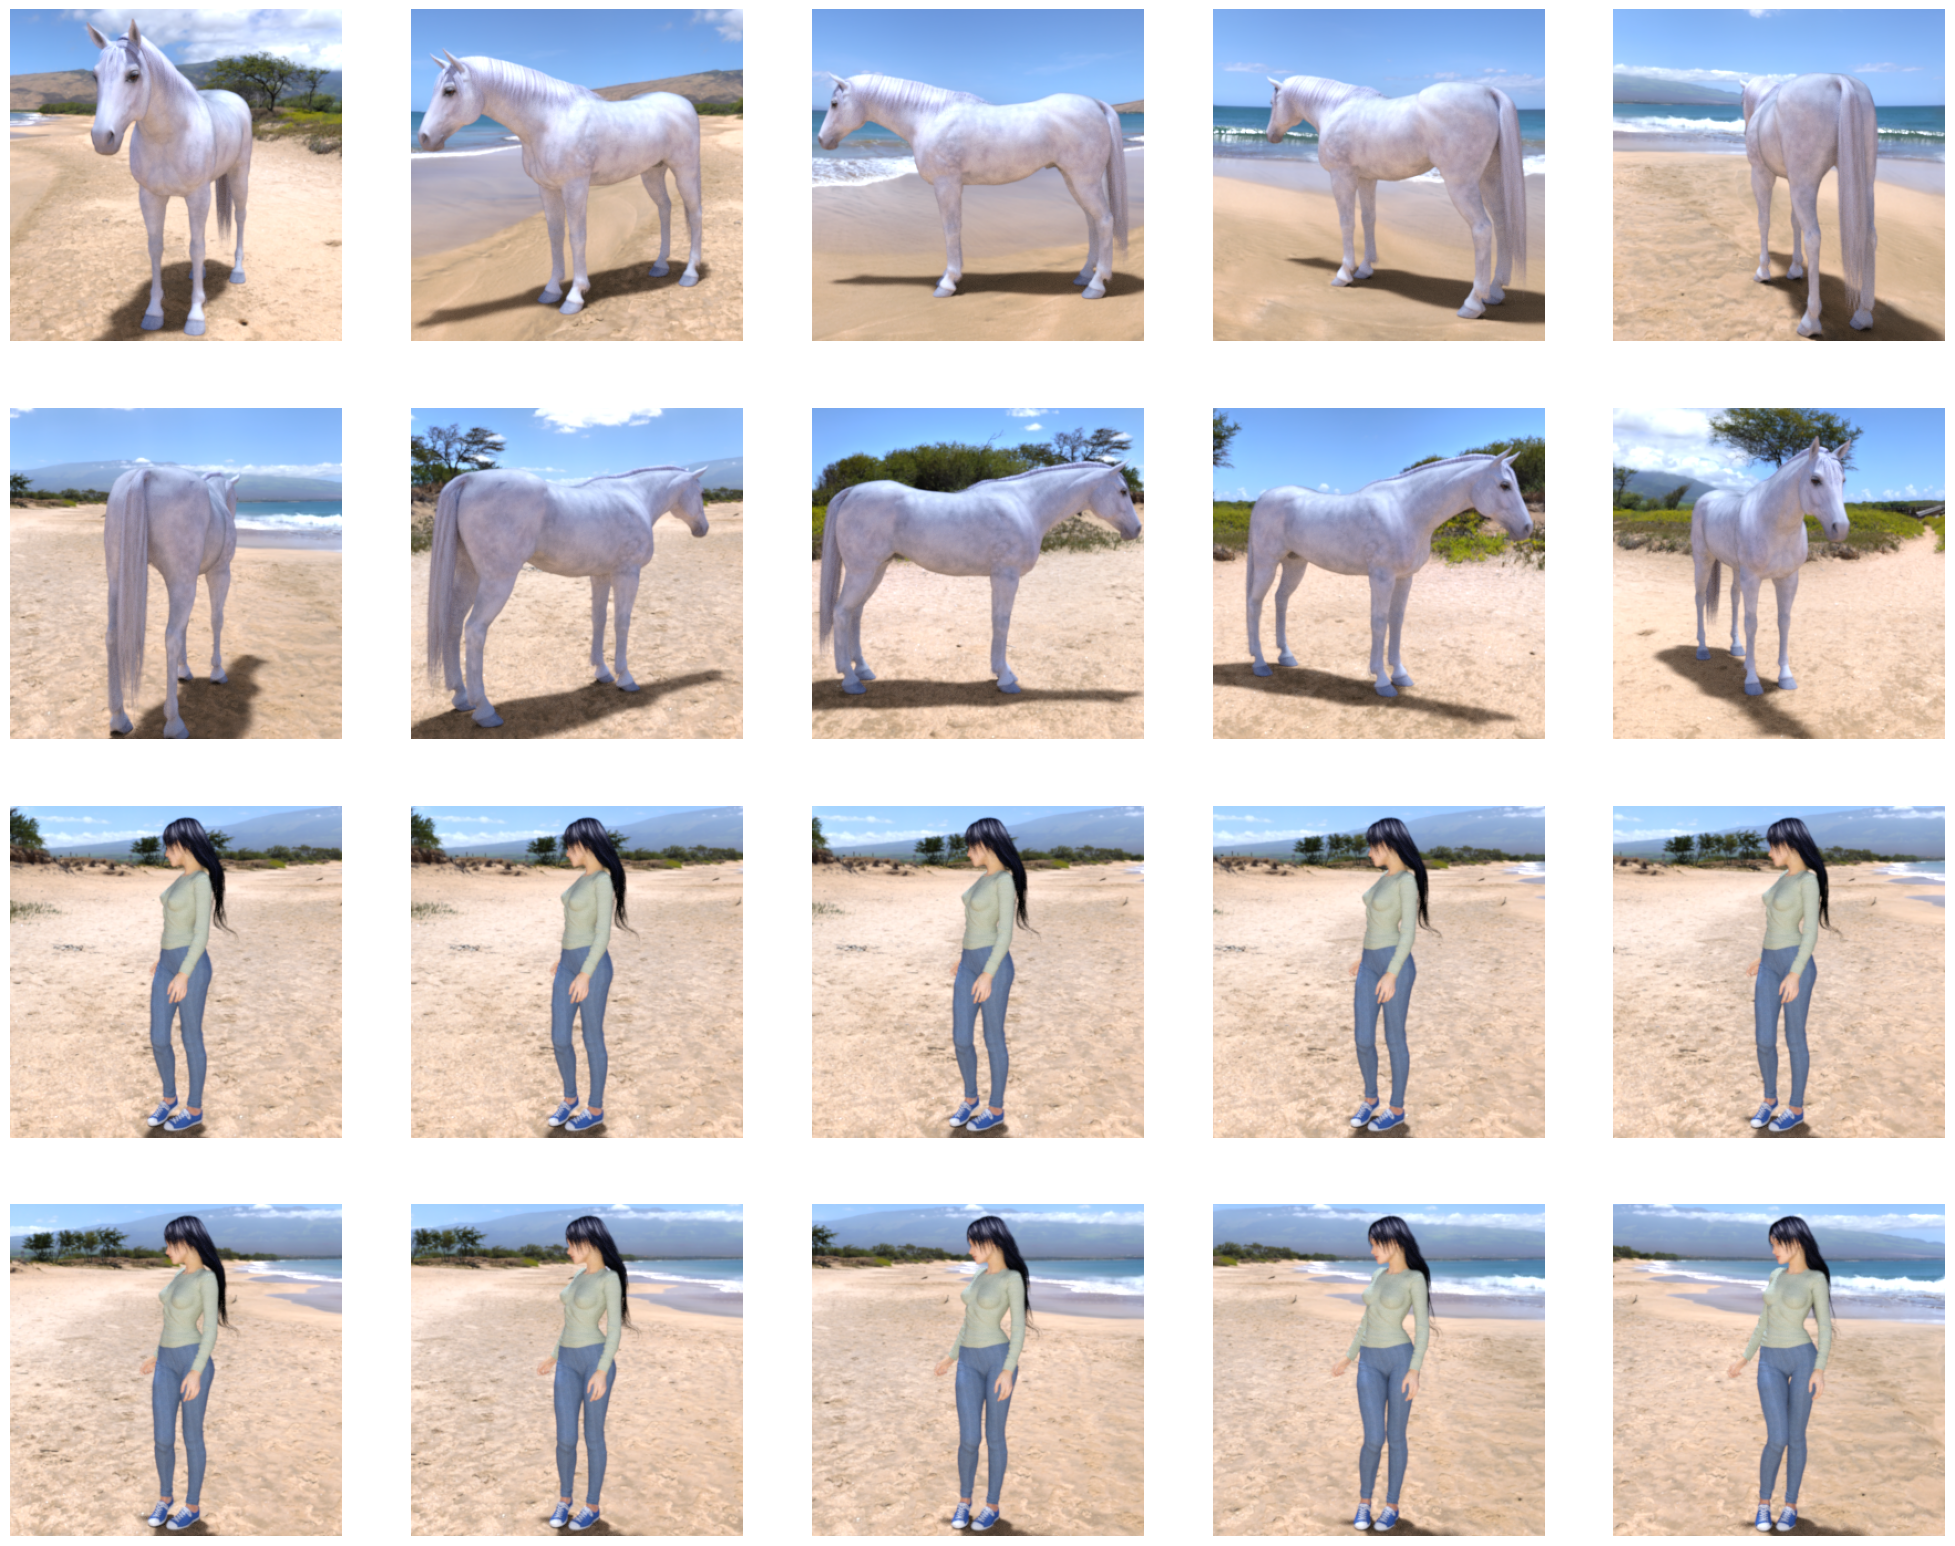

In [16]:
import matplotlib.image as mpimg

# plotting the images of shape 5x5
n_rows = 5
n_columns = 5

# idx for iterating over the images
pic_ind = 0

fig = plt.gcf() # get current figure
fig.set_size_inches(n_columns*5, n_rows*5)

# get the path for the figures
next_horse_pic = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_ind:pic_ind+10]]
next_human_pic = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_ind:pic_ind+10]]

for i, img_path in enumerate(next_horse_pic+next_human_pic):
  plt.subplot(n_rows, n_columns, i+1)
  plt.axis(False)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [17]:
import tensorflow as tf

model = tf.keras.Sequential([# First Convolution layer
                             tf.keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu, input_shape=(300, 300, 3)),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Second Convolution layer
                             tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Third Convolution layer
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Fourth Convolution layer
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Fifth Convolution layer
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Flatten and feed into DNN
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [23]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1/255)
validation_datagen = ImageDataGenerator(1/255)

train_generator = train_datagen.flow_from_directory('./dataset/train/',
                                                    target_size=(300, 300),
                                                    batch_size=128,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory('./dataset/validation/',
                                                              target_size=(300, 300),
                                                              batch_size=32,
                                                              class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.10):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8,
    callbacks=[callbacks]
)

C:\Users\Anant\anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/15
8/8 [==============================] - 56s 6s/step - loss: 160.6933 - accuracy: 0.5295 - val_loss: 0.4353 - val_accuracy: 0.8164
Epoch 2/15
8/8 [==============================] - 44s 5s/step - loss: 0.6411 - accuracy: 0.6895 - val_loss: 0.4246 - val_accuracy: 0.7734
Epoch 3/15
8/8 [==============================] - 38s 5s/step - loss: 0.3859 - accuracy: 0.8142 - val_loss: 0.3364 - val_accuracy: 0.8672
Epoch 4/15
8/8 [==============================] - 39s 5s/step - loss: 5.6354 - accuracy: 0.5539 - val_loss: 0.4747 - val_accuracy: 0.7773
Epoch 5/15
8/8 [==============================] - 37s 4s/step - loss: 0.4361 - accuracy: 0.8276 - val_loss: 0.3645 - val_accuracy: 0.8008
Epoch 6/15
8/8 [==============================] - 38s 5s/step - loss: 1.1683 - accuracy: 0.6919 - val_loss: 0.4022 - val_accuracy: 0.9023
Epoch 7/15
8/8 [==============================] - 42s 5s/step - loss: 0.6250 - accuracy: 0.8125 - val_loss: 0.2851 - val_accuracy: 0.8906
Epoch 8/15
8/8 [================

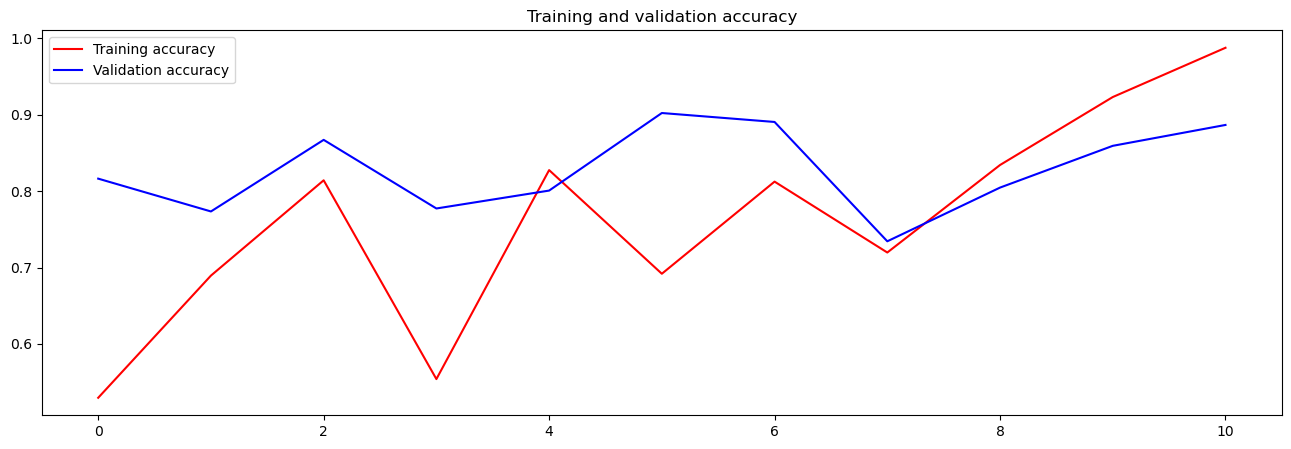

<Figure size 640x480 with 0 Axes>

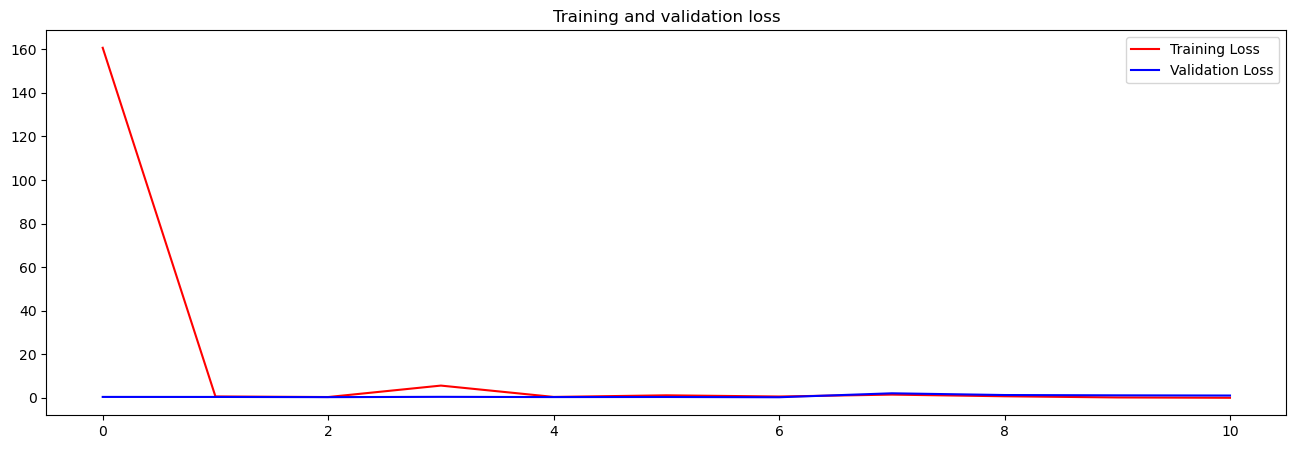

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16, 5))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.figure(figsize=(16, 5))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 287ms/step


C:\Users\Anant\AppData\Local\Temp\ipykernel_9708\2283243284.py:33: RuntimeWarning: invalid value encountered in true_divide
  x = x/x.std()


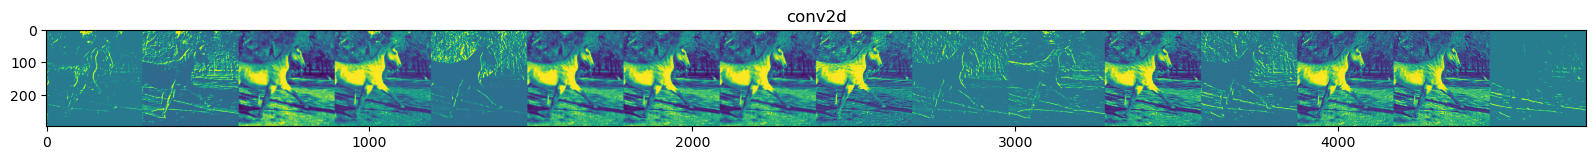

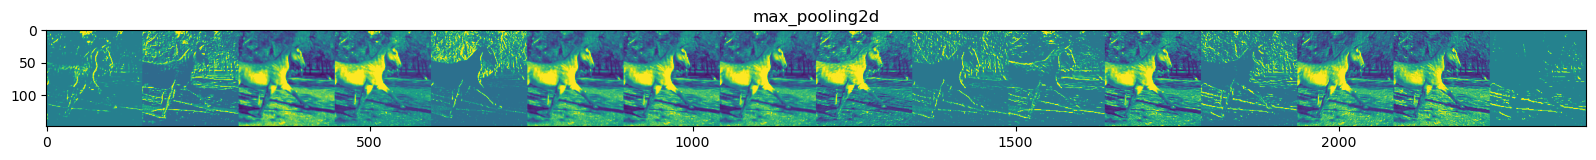

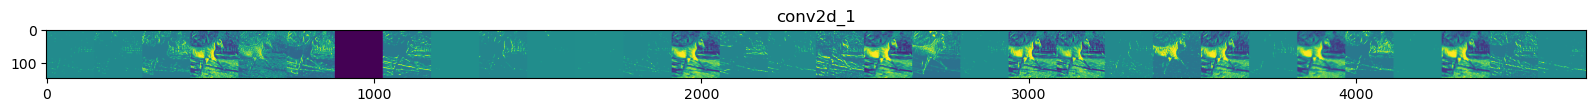

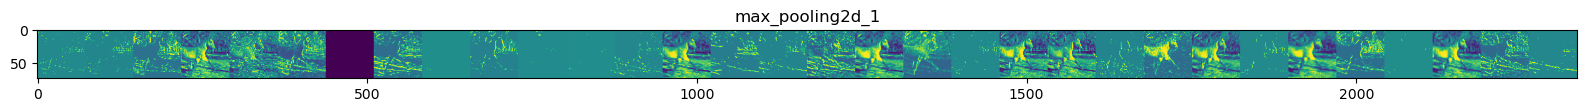

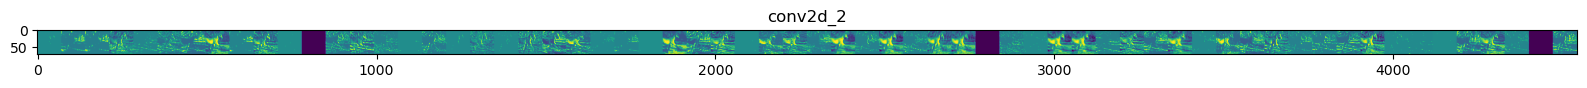

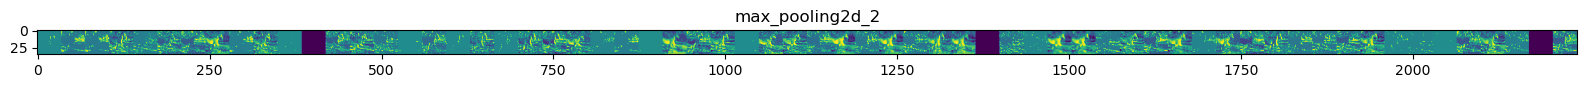

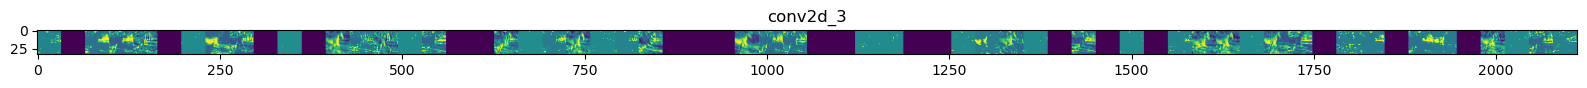

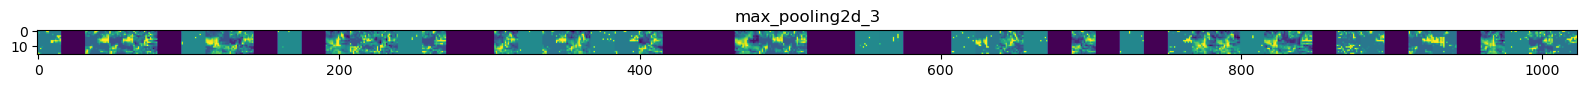

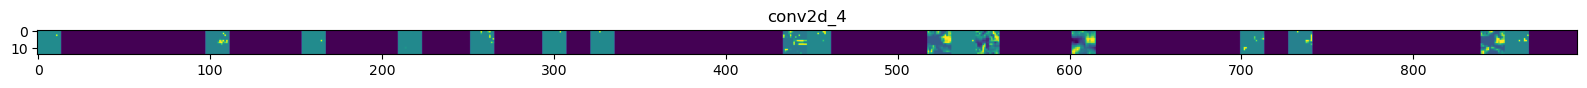

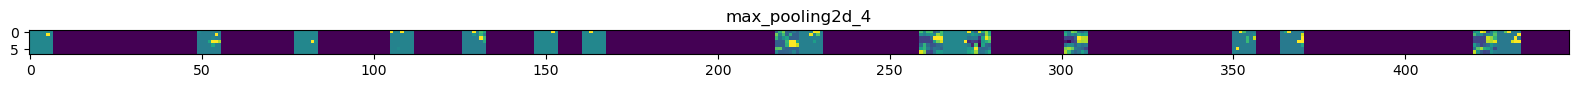

In [28]:
import numpy as np
import random
from tensorflow.keras.preprocessing import image

layers_outputs = [layer.output for layer in model.layers]
visulaization_model = tf.keras.models.Model(inputs=model.inputs, outputs=layers_outputs)

# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files+human_img_files)

img = image.load_img(img_path, target_size=(300, 300))
x = image.img_to_array(img) # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 300, 300, 3)

# Rescale
x = x/255

successive_feature_maps = visulaization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape)==4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size*n_features))

    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x = x -x.mean()
      x = x/x.std()
      x = x*64 + 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i*size : (i+1)*size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale*n_features, scale))
    plt.grid(False)
    plt.title(layer_name)
    plt.imshow(display_grid)

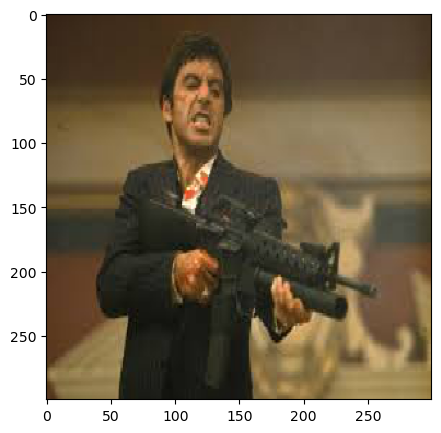

1/1 [==============================] - 0s 54ms/step
al.jpg is a human


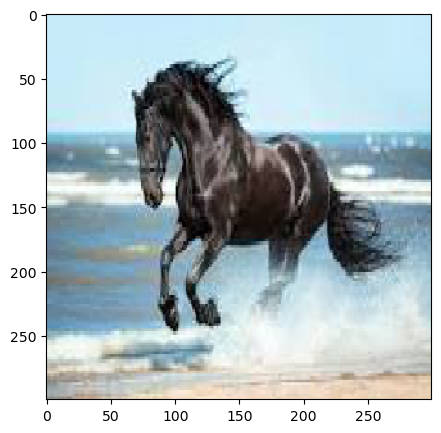

1/1 [==============================] - 0s 46ms/step
horse1.jpg is a horse


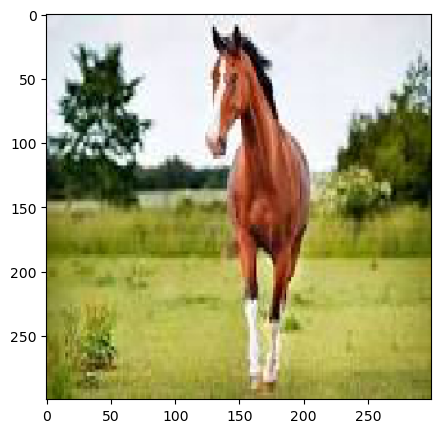

1/1 [==============================] - 0s 51ms/step
horse2.jpg is a horse


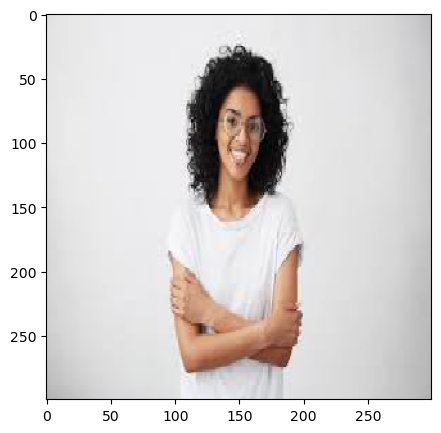

1/1 [==============================] - 0s 51ms/step
human1.jpg is a human


In [38]:
import os
import numpy as np
import keras.utils as image


# Define the path to the test folder
test_folder = './test/'

# Get a list of image filenames in the test folder
image_files = os.listdir(test_folder)

# Loop through each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(test_folder, image_file)
  
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(300, 300))
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Perform the image classification
    classes = model.predict(x, batch_size=10)

    # Print the result
    if classes[0] > 0.5:
        print(image_file + ' is a human')
    else:
        print(image_file + ' is a horse')


In [39]:
model.save('my_model.h5')